To do:
1. data prepare and load
2.Build model
3. fitting the model to data(training)
4. making predictions and evaluting the model
5.saving and loading a model
6. putting it all together


In [ ]:
import torch
from torch import nn  # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

##Data preparing and loading

* Excel spreadsheet
* Image of any kind
* Videos
* Audio
* DNA
* text

##Machine learning is a game of two parts:

Turn your data, into numbers (a representation).

Pick or build a model to learn the representation as best as possible

In [ ]:
# Create *Known* parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

##Splitting data into training and testing sets

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

##To visualize data - matplotlib

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):


  plt.figure(figsize = (10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels,c="b",s=4,label="training data")

  #plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="test data")

  if predictions is not None:
    #plot predictions in red (predictions in test data)
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  plt.legend(prop={"size":14})


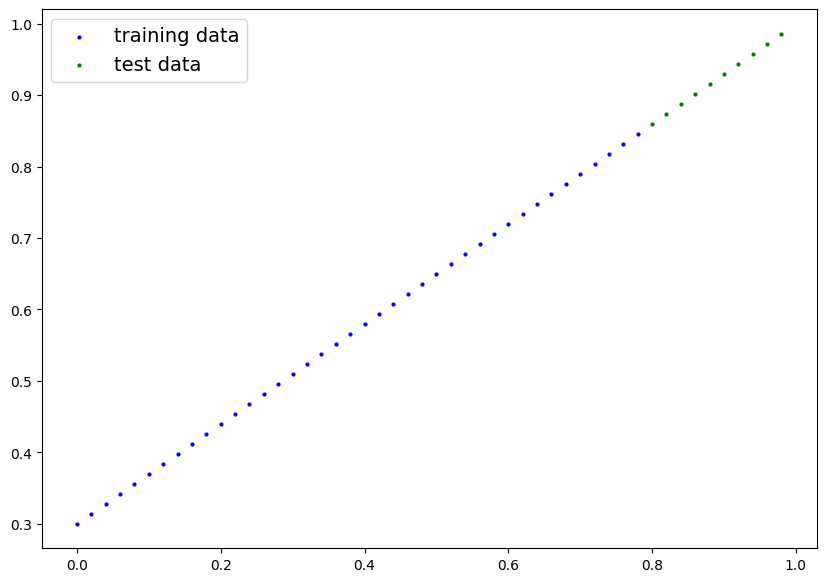

In [ ]:
plot_predictions();

##Building Model

In [ ]:
# Create linear regressor model class
class linear_regressor(nn.Module):
   # -> almost Everything in pytorch inherit from nn.Module
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,  # <- start with random weights
                                           requires_grad = True,  # <- can we update this value with gradient descent?)
                                           dtype=torch.float)) # <- PyTorch loves float32 by default
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

# forward method to define the computation model
  def forward(self,x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
    return self.weight * x + self.bias # <- this is the linear regression formula (y = m*x + b)

####what this model does:

* start with the random values(weight, bias)

* look at the training data and adjusts the random values to better represents (or get closer to) the ideal values (the weight and bias values we used to create the data)



How does it do so:
1. Gradient descent
2. backpropagation

#### Pytorch builiding block essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)

* torch.nn.Parameter - what parameters should our model try and learn, often pytorch layer from torch.nn will set these for us.

* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite
forward() (Requires a forward() method be implemented.)

* torch.optium - Contains various optimization algorithms, they will also help in gradient descent

* def forward() - all nn.Module subclass require you to overwrite forward(), this method defines what happens in the forward computation.


In [ ]:
### Checking the contents of our pyTorch models
torch.manual_seed(42)
model_0 = linear_regressor()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
## making predictions using 'torch.inference_mode()'

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# torch.inference_mode(): is to make the predictions.
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds


# Note: in older PyTorch code you might also see torch.no_grad() but inference_mode() is to be preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

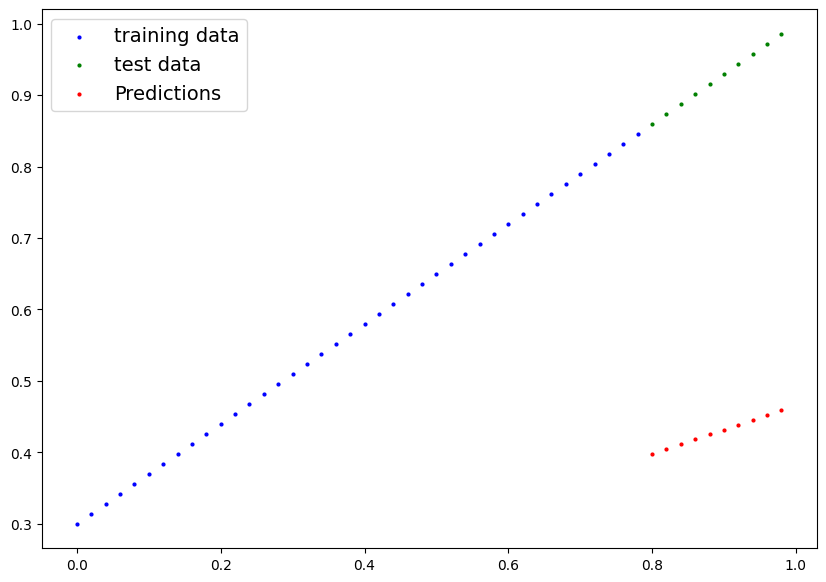

In [ ]:
plot_predictions(predictions = y_preds)

####Train model

* The whole idea of training is for a model to move from some unknown parameters(these may be random) to some *known* parameters.

[or in other words from a poor representation of the data to a better representation of the data]

* One way to measure how poor or how wrong your model is predicting is by calulating the loss function(lower is the better).

* **Optimisers**: take into acoount the loss of a model and adjust the models parameters accordingly to improve the loss function.

[Tells your model how to update its internal parameters to best lower the loss.]

And specifically for pyTorch we need:
* A training loop
* A testing loop


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


##Train model
Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

* params = the model parameters you'd like to optimize

* lr (learning rate) = the learning rate is a hyperparameter that defines how big/ small the optimiser changes the parameters with each step (a **small lr** results in a small changes, **a large lr** means a large changes)

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# SetUp an optimiser
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.001)  # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

#### Building a training and a testing loop

A couple of things we need in a training loop:
0. loop through the data.

1. forward pass (this involves data moving through the model's 'forward()' function) to make predictions on data - called forward propagation.
ie. input * weight + bias

2. calculate the loss(compare forward pass predictions to actual value).

3. loss backward (backpropagation) - move backword through the network to calculate the gradients of each of the parameters of our model with respect to the loss.

4. optimizer step - use the optimiser to adjust out model's parameters to try and improve the loss(gradient descent).

In [ ]:
# Epoch : one complete cycle/loop through the data...(hyperparameters coz we have to set this)

In [ ]:
torch.manual_seed(42)
epochs = 1500


## Track different values:
epoch_count = []
loss_values = []
test_loss_values = []


# Training
# 0. loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients.

  # 1. forward pass:
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred,y_train)
  # print(f"Loss: {loss}")

  # 3. optimizer zero grad
  optimizer.zero_grad() #The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.

  # 4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. step the optimizer (perform gradient descent) or Progress the optimizer
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above step 3

  model_0.eval() # (turn off different settings in the model not needed for evaluation/testing)

  with torch.inference_mode(): #turns off gradient tracking
    # 1. do the forward pass in testing mode
    test_pred = model_0(X_test)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred,y_test)


  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4931890368461609
Epoch: 10 | Loss: 0.3013603389263153 | Test Loss: 0.4797181189060211
Epoch: 20 | Loss: 0.28983938694000244 | Test Loss: 0.4662471413612366
Epoch: 30 | Loss: 0.2783183455467224 | Test Loss: 0.4527761936187744
Epoch: 40 | Loss: 0.26679736375808716 | Test Loss: 0.43930521607398987
Epoch: 50 | Loss: 0.2552763819694519 | Test Loss: 0.4258342385292053
Epoch: 60 | Loss: 0.24375538527965546 | Test Loss: 0.41236335039138794
Epoch: 70 | Loss: 0.232234388589859 | Test Loss: 0.398892343044281
Epoch: 80 | Loss: 0.22071340680122375 | Test Loss: 0.38542139530181885
Epoch: 90 | Loss: 0.2091923952102661 | Test Loss: 0.3719504475593567
Epoch: 100 | Loss: 0.19767141342163086 | Test Loss: 0.35847947001457214
Epoch: 110 | Loss: 0.18615040183067322 | Test Loss: 0.34500852227211
Epoch: 120 | Loss: 0.17462942004203796 | Test Loss: 0.33153754472732544
Epoch: 130 | Loss: 0.16310855746269226 | Test Loss: 0.3180667459964752
Epoch: 140 | Loss: 0.

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

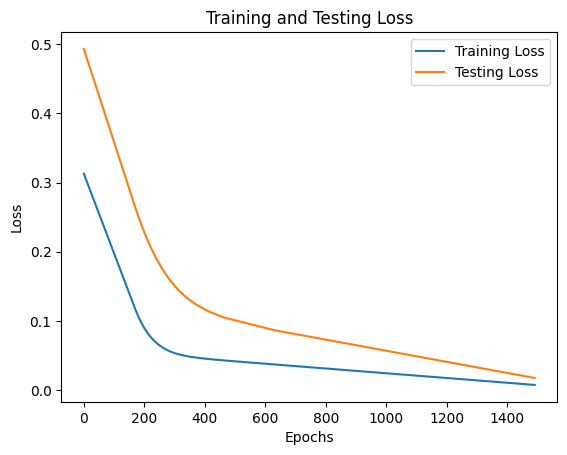

In [ ]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Testing Loss")
plt.title("Training and Testing Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();
plt.show()


In [ ]:
model_0.state_dict() # before training

OrderedDict([('weight', tensor([0.6642])), ('bias', tensor([0.3150]))])

In [ ]:
model_0.state_dict() # after training

OrderedDict([('weight', tensor([0.6642])), ('bias', tensor([0.3150]))])

In [ ]:
weight, bias

(0.7, 0.3)

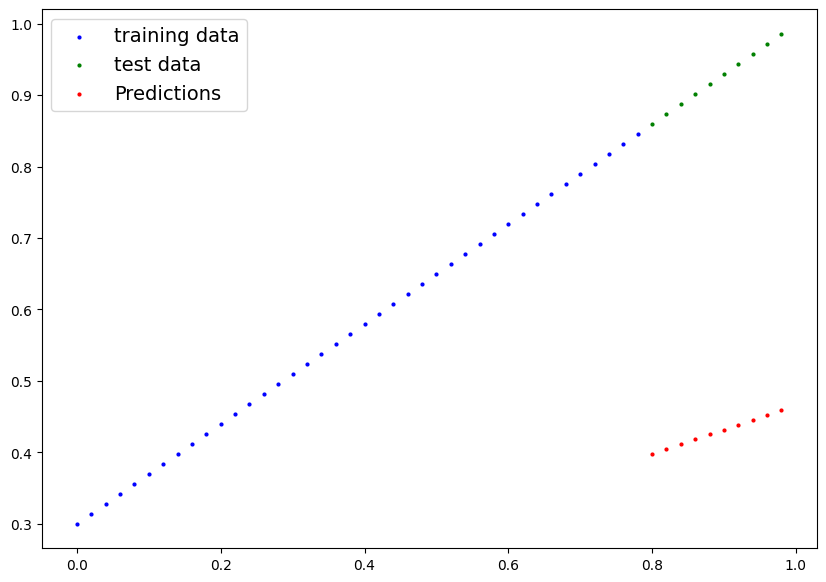

In [ ]:
plot_predictions(predictions = y_preds)

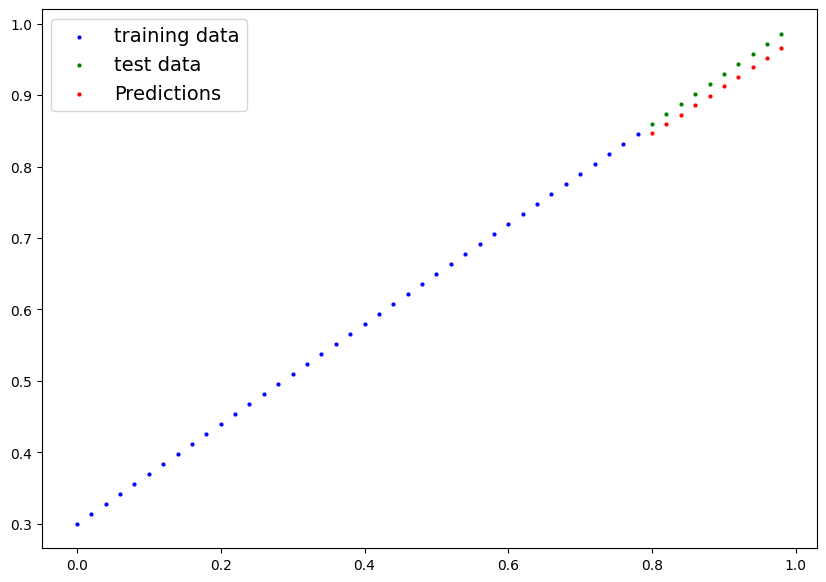

In [ ]:
plot_predictions(predictions = y_pred_new)

###Saving a model in pyTorch

There are three main method you should use for saving and loading models in PyTorch

1. 'torch.save()' = allow you to save a PyTorch object in python's pickle format

2. 'torch.load()' = allow you load a saved PyTorch object

3. 'torch.nn.Module.load_state_dict()' = this allow to load a model's saved state dictionary

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6642])), ('bias', tensor([0.3150]))])

In [ ]:
# Saving pyTorch model
from pathlib import Path

# Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model.pth


##Loading a PyTorch Model
since we saved our model's state_dict() rather the entire model, we will create a new instance of our model class and load the saved state_dict() into that.

In [ ]:
loaded_model_0 = linear_regressor()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-29-4e35194c14e0>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6642])), ('bias', tensor([0.3150]))])

In [ ]:
# Make some prediction with our loaded Model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8464],
        [0.8597],
        [0.8730],
        [0.8863],
        [0.8995],
        [0.9128],
        [0.9261],
        [0.9394],
        [0.9527],
        [0.9660]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = loaded_model_0(X_test)

y_preds

tensor([[0.8464],
        [0.8597],
        [0.8730],
        [0.8863],
        [0.8995],
        [0.9128],
        [0.9261],
        [0.9394],
        [0.9527],
        [0.9660]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together



###6.1 Data

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__


'2.5.1+cu121'

Create device agnostic code.

This means if we have got access to a GPU, our code will use it (for potentially faster computing)

if no GPU available , then code will default use CPU

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
## Create some data using the linear regression formula : y = weight * x + bias

weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

#Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1) # without unsqueeze, errors will pop up
y = weight * X + bias

X[:10], y[:10]




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

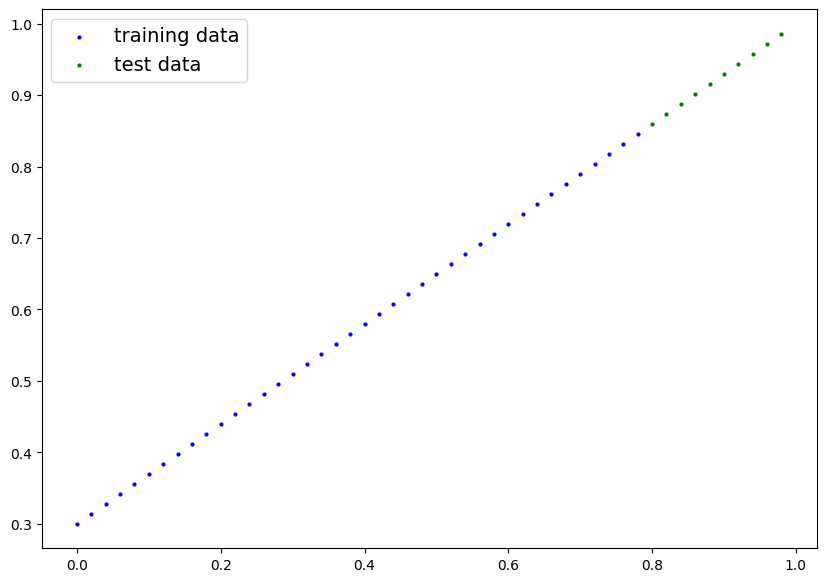

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear Model


In [ ]:
## Create a linear model by subclasssing nn.Moodule
class LinearRegressionModel_V_2(nn.Module):
  def __init__(self):  # Fixed method name
        super().__init__()
    ## Use nn.linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
         # Define a linear layer with in_features=1 and out_features=1
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


torch.manual_seed(42)# Set the random seed for reproducibility

# Create an instance of the model
model_1 = LinearRegressionModel_V_2()
model_1, model_1.state_dict()

(LinearRegressionModel_V_2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training
 for training we need
 * Loss function
 * Optimizer
 * training loop
 * testing loop



In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(),# optimize newly created model's parameters
                            lr = 0.01)

In [ ]:
torch.manual_seed(42)

epochs = 1000


# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5090939998626709 | Test loss: 0.520092248916626
Epoch: 100 | Train loss: 0.0048439702950417995 | Test loss: 0.010365551337599754
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


####6.4 Making and Evaluating Predictions

In [ ]:
#Turn Model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

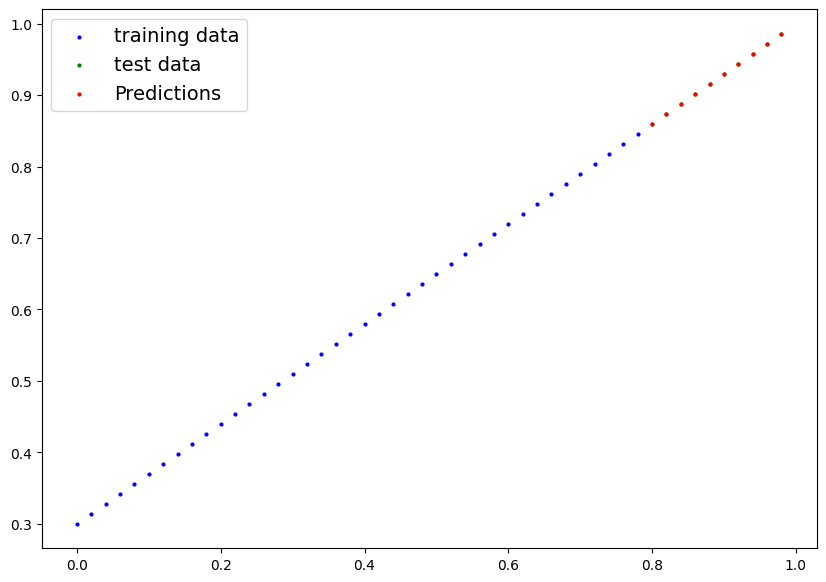

In [ ]:
plot_predictions(predictions = y_preds)

###6.5 Saving and loading the model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModel_V_2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModel_V_2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


<ipython-input-62-fa04a6809df8>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])